# Задание 1, 2 

In [4]:
import pandas as pd

In [5]:
BAR = pd.read_csv('brent_prices.csv', sep=';')
RUB = pd.read_csv('dollar_curs.csv', sep=';')
INR = pd.read_csv('indian_curs.csv', sep=';')

#### Вывод данных из ДатаФреймов

In [6]:
BAR.head()

,<TICKER>,<PER>,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<VOL>
0,ICE.BRN,M,20180901,77.69,83.41,75.64,82.98,3141389
1,ICE.BRN,M,20181001,82.97,86.74,74.58,74.59,4406167
2,ICE.BRN,M,20181101,74.69,74.99,57.78,59.07,4333185
3,ICE.BRN,M,20181201,59.98,63.73,50.22,54.15,3459773
4,ICE.BRN,M,20190101,54.12,63.15,52.51,61.22,3659813


In [7]:
RUB.head()

,curs,nominal,date
0,65.854527,1.0,2018-10-01
1,66.355681,1.0,2018-11-01
2,67.335314,1.0,2018-12-01
3,66.512544,1.0,2019-01-01
4,65.810525,1.0,2019-02-01


In [8]:
INR.head()

,curs,nominal,date
0,89.510109,100.0,2018-10-01
1,92.270848,100.0,2018-11-01
2,95.322173,100.0,2018-12-01
3,93.633431,100.0,2019-01-01
4,92.382145,100.0,2019-02-01


#### На данный момент имеем: 
BAR к доллару, Доллар к RUB, 100 Индийских рупий к Рублю. 
Приведём все данные к одной величине

#### 1 рубль - n долларов

In [9]:
RUB['curs'] = 1 / RUB['curs'] 

In [10]:
RUB.head()

,curs,nominal,date
0,0.015185,1.0,2018-10-01
1,0.015070,1.0,2018-11-01
2,0.014851,1.0,2018-12-01
3,0.015035,1.0,2019-01-01
4,0.015195,1.0,2019-02-01


#### 1 рупия - k долларов 
Массивы одинакового размера, поэтому так делать можно

In [11]:
INR['curs'] = INR['curs'] * RUB['curs'] / 100

In [12]:
INR.head()

,curs,nominal,date
0,0.013592,100.0,2018-10-01
1,0.013905,100.0,2018-11-01
2,0.014156,100.0,2018-12-01
3,0.014078,100.0,2019-01-01
4,0.014038,100.0,2019-02-01


#### Соберёмся всё в 1 ДатаФрейм

In [117]:
df = pd.DataFrame({'BAR': BAR['<CLOSE>'], 'RUB': RUB['curs'], 'INR': INR['curs']})

In [118]:
df.head()

,BAR,RUB,INR
0,82.98,0.015185,0.013592
1,74.59,0.015070,0.013905
2,59.07,0.014851,0.014156
3,54.15,0.015035,0.014078
4,61.22,0.015195,0.014038


# Задание 3 

In [119]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

### Построение графиков P-P и Q-Q для переменных BAR, RUB, INR

#### BAR

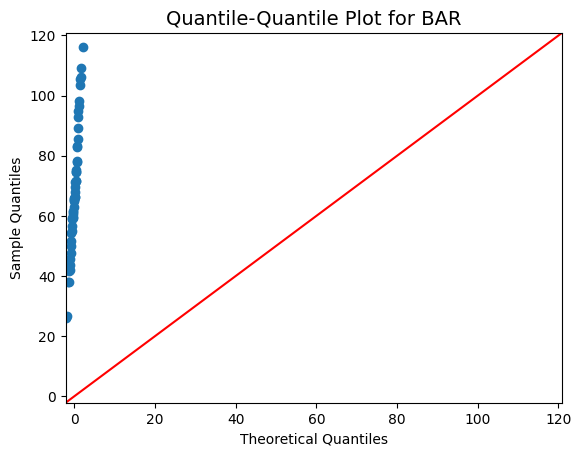

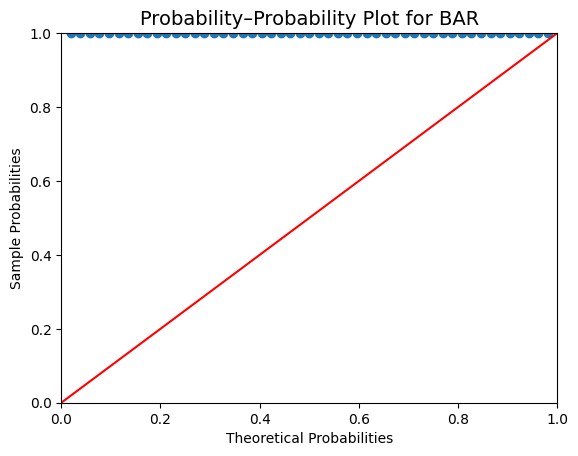

In [120]:
probplot = sm.ProbPlot(df['BAR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for BAR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for BAR', fontsize=14)

plt.show()

#### INR

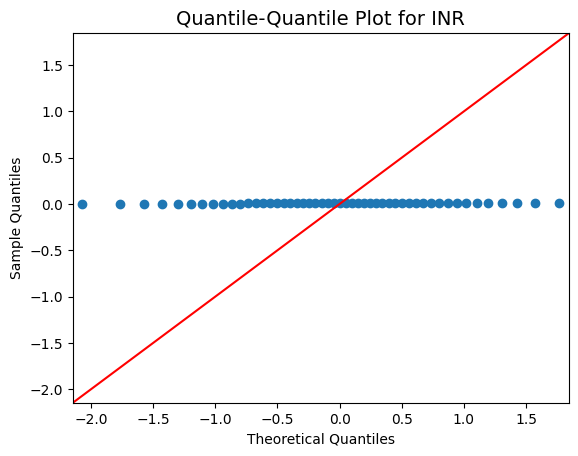

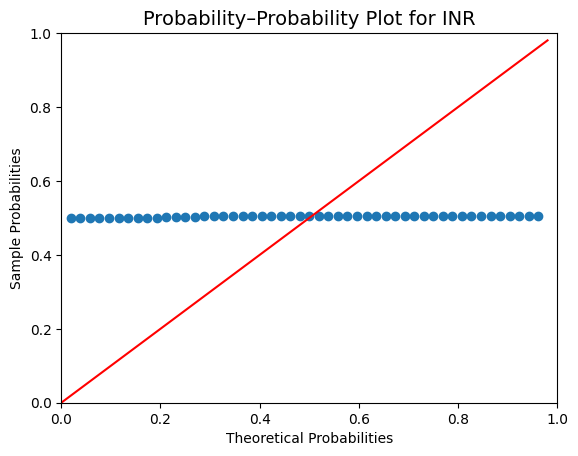

In [121]:
probplot = sm.ProbPlot(df['INR'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for INR', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for INR', fontsize=14)

plt.show()

#### RUB

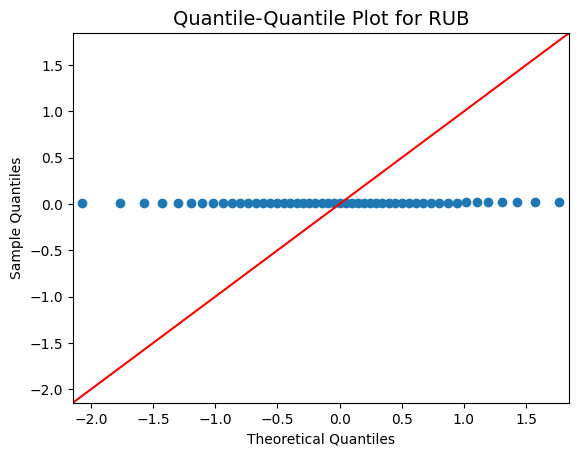

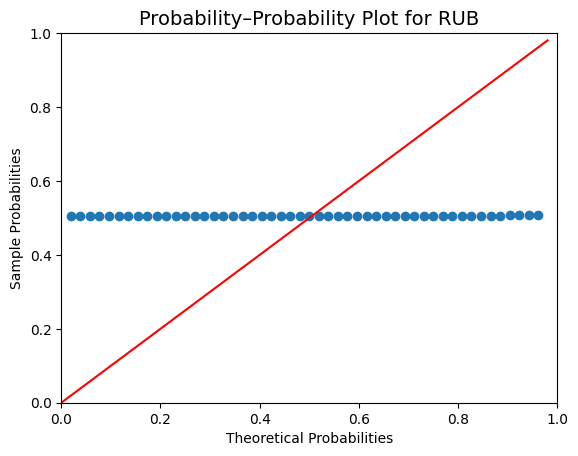

In [122]:
probplot = sm.ProbPlot(df['RUB'])
probplot.qqplot(line = '45')
plt.title('Quantile-Quantile Plot for RUB', fontsize=14)
probplot.ppplot(line = '45')
plt.title('Probability–Probability Plot for RUB', fontsize=14)

plt.show()

### Вывод: требуется стандартизация данных

In [123]:
from sklearn import preprocessing
scaler_std = preprocessing.StandardScaler()
scaler_range = preprocessing.MinMaxScaler()

#### Способ 1

In [124]:
for i in df.columns:
    df[i] = scaler_std.fit_transform(df[[i]])

#### Способ 2

In [125]:
for i in df.columns:
    df[i] = scaler_range.fit_transform(df[[i]])

In [126]:
df.head()

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287


In [129]:
df

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287
5,0.446707,0.728254,0.988052
6,0.463973,0.743120,0.989814
7,0.506253,0.736540,0.983894
8,0.396680,0.756502,0.989334
9,0.439513,0.786315,1.000000


In [138]:
df = df.dropna()
df

,BAR,RUB,INR
0,0.631544,0.705527,0.928594
1,0.538683,0.690869,0.952296
2,0.366906,0.662848,0.971267
3,0.312452,0.686327,0.965309
4,0.390703,0.706824,0.962287
5,0.446707,0.728254,0.988052
6,0.463973,0.743120,0.989814
7,0.506253,0.736540,0.983894
8,0.396680,0.756502,0.989334
9,0.439513,0.786315,1.000000


# Задание 4

#### Нахождение моды, медианы и среднего арифметического 

In [139]:
import statistics as st

In [140]:
def mmm(xxx):
    print("Среднее арифметическое значение столбца ",xxx," равно ",st.mean(df[xxx]))
    print("Медиана столбца ",xxx," равна ",st.median(df[xxx]))
    print("Мода столбца ",xxx," равна ",st.mode(df[xxx]))

In [145]:
def histmmm(xxx):
    fig, ax = plt.subplots()
    ax.vlines(st.mean(df[xxx]), 0, df[xxx].size, colors="Red", label="mean")
    ax.vlines(st.median(df[xxx]), 0, df[xxx].size, colors="Green", label="median")
    ax.vlines(st.mode(df[xxx]), 0, df[xxx].size, colors="Purple", label="mode")
    df[xxx].plot.hist()
    plt.title(f'Data Set Histogram for {xxx}', fontsize=14)
    plt.legend(title="Parameters:")
    plt.show()

#### Проверка для моды вручную:

In [155]:
def check_moda(xxx):
# Создаём пустой словарь, в котором будем считать количество появлений цен
    counts = {}
    for p in df[xxx]:
        if p not in counts:
            counts[p] = 1
        else:  
            counts[p] += 1

# df_count_BAR = pd.DataFrame({'BAR': BAR_counts})
# print(df_count_BAR)
# Проходимся по словарю и ищем максимальное количество повторений
    maxp = 0
    mode_price = None
    for k, v in counts.items():
        if maxp < v:
            maxp = v
            mode_price = k
    print("Мода вручную равна ",mode_price, maxp) 

#### Нахождение средних значений и построение гистограммы

Среднее значение столбца  BAR  равно  0.46477255118981736
Медиана столбца  BAR  равна  0.44172661870503593
Мода столбца  BAR  равна  0.6315439955727726
Мода вручную равна  0.6315439955727726 1


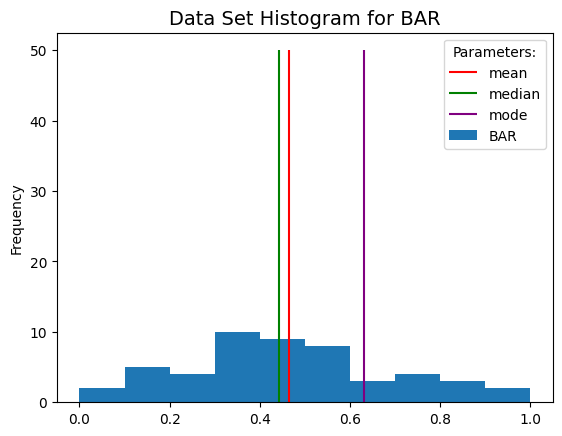

In [156]:
mmm('BAR')
check_moda('BAR')
histmmm('BAR')

Среднее значение столбца  RUB  равно  0.6194926331064535
Медиана столбца  RUB  равна  0.584623157356034
Мода столбца  RUB  равна  0.7055267107131082
Мода вручную равна  0.7055267107131082 1


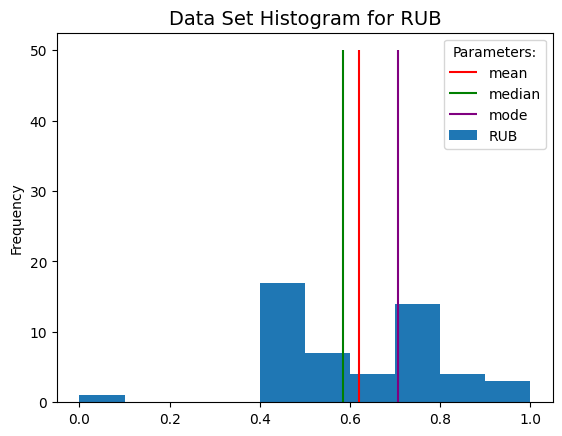

In [160]:
mmm('RUB')
check_moda('RUB')
histmmm('RUB')

Среднее значение столбца  INR  равно  0.6740434146238291
Медиана столбца  INR  равна  0.8529620623609306
Мода столбца  INR  равна  0.9285936700873221
Мода вручную равна  0.9285936700873221 1


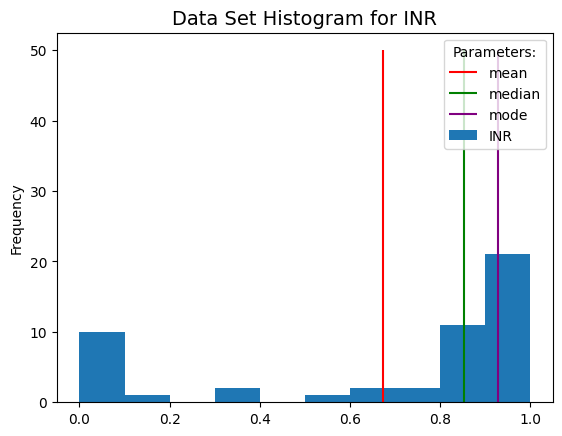

In [159]:
mmm('INR')
check_moda('INR')
histmmm('INR')

# Задание 5

# Задание 6

# Задание 7

# Задание 8

# Задание 9